## Введение в теорию вероятностей. Домашнее задание

###Итоги модуля 
Теория вероятностей возникла на основе анализа азартных игр. Определение закономерности исходов бросков игральных костей и вычисление шансов на выигрыш в таких играх привели учёных к интуитивному определению вероятности. Классическая формула вероятности — это отношение числа благоприятных исходов ко всем исходам. 
На уроке изучались вероятности, возникающие на примере бросания игральных кубиков и подбрасывания монетки. Также мы обсудили разницу вероятностных и статистических моделей. В конце модуля было введено понятие геометрической вероятности и рассмотрен связанный с ней метод Монте-Карло.

###Цели домашнего задания
- Закрепить полученные знания об определении вероятности.
- С помощью ряда статистических экспериментов лучше осознать разницу между вероятностной и статистической картиной мира.
- Ближе познакомиться с поведением случайных величин на практике, применив метод Монте-Карло.

###Что нужно сделать
В домашнем задании предлагается воспользоваться Jupyter Notebook для проведения наглядных статистических экспериментов. Это задачи на анализ подбрасывания монетки, бросания двух игральных кубиков и подсчёта площадей методом Монте-Карло. 
Нужно запустить готовый код, дописать его там, где требуется, посмотреть, как работает эксперимент и как зависят его результаты от различных факторов. В каждой задаче также предлагается ответить на несколько вопросов и аргументировать свой ответ.

### Что оценивается
Умение построить взаимосвязь между теоретическими вероятностями и статистическими экспериментами. В каждой задаче требуется поэкспериментировать с разными значениями параметров функций и ответить на вопросы. Задача считается выполненной, если выполнены все её условия, а также даны аргументированные ответы на вопросы.
Во втором задании также требуется дописать программу.

### Как отправить задание на проверку
Выполните задания, сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него через форму на платформе.

Кроме того, задания содержат несколько вопросов. Напишите ответы на эти вопросы сразу в форме. Постарайтесь аргументировать ваш ответ.


### Импорт библиотек

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

###**Задание 1.** 
Функция `coinToss` позволяет смоделировать процесс подбрасывания монетки любое количество раз. Это число задаётся параметром `number`. В результате функция выводит число испытаний и доли орлов и решек в последнем эксперименте, а также рисует график, на котором представлена суммарная доля выпавших орлов ко всем испытаниям с увеличением номера `n` от 1 до `number`.

1. Поэкспериментируйте и запустите функцию на разных значениях number. Проанализируйте поведение графика. Какими свойствами обладает кривая? 

2. К чему стремится доля орлов при увеличении числа испытаний? Как можно это объяснить?


In [3]:
def coinToss(number):
    recordList, proportionList, orli, reshki = [], [], 0, 0
    rangeList = range(1, number+1) #количество бросков
    for i in rangeList: 
        flip = random.randint(0, 1) #возвращает либо 0 (орёл), либо 1 (решка)
        if flip == 0:
            recordList.append("О")
            orli += 1
        else:
            recordList.append("Р")
            reshki += 1
        proportionList.append(orli/i)
    
    print("Число испытаний: "+ str(number))
    print("Доля орлов: " + str(orli/i) + " Доля решек: " + str(reshki/i))
    
    #Построение графика
    plt.figure(figsize=(40, 10), dpi=80)
    plt.plot(rangeList, proportionList)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(np.arange(1, number+4, step=5))
    plt.yticks(np.arange(0, 1.1, step=0.1))

Число испытаний: 5
Доля орлов: 0.6 Доля решек: 0.4


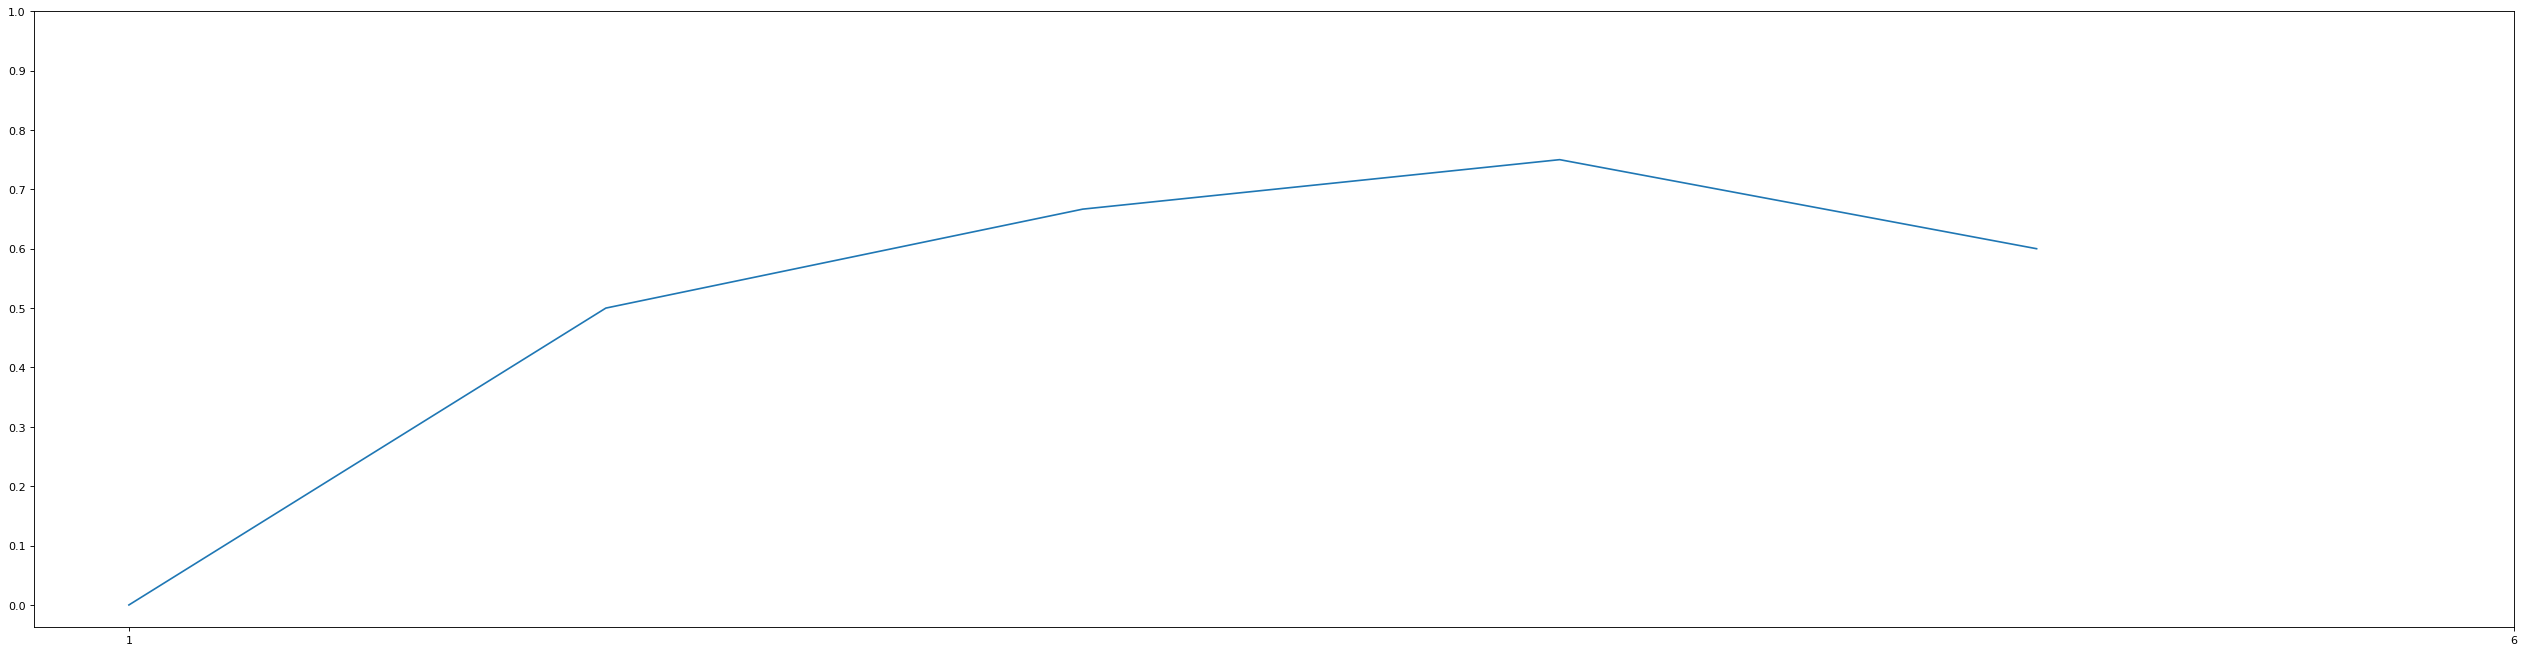

In [4]:
coinToss(5)

Число испытаний: 10
Доля орлов: 0.2 Доля решек: 0.8


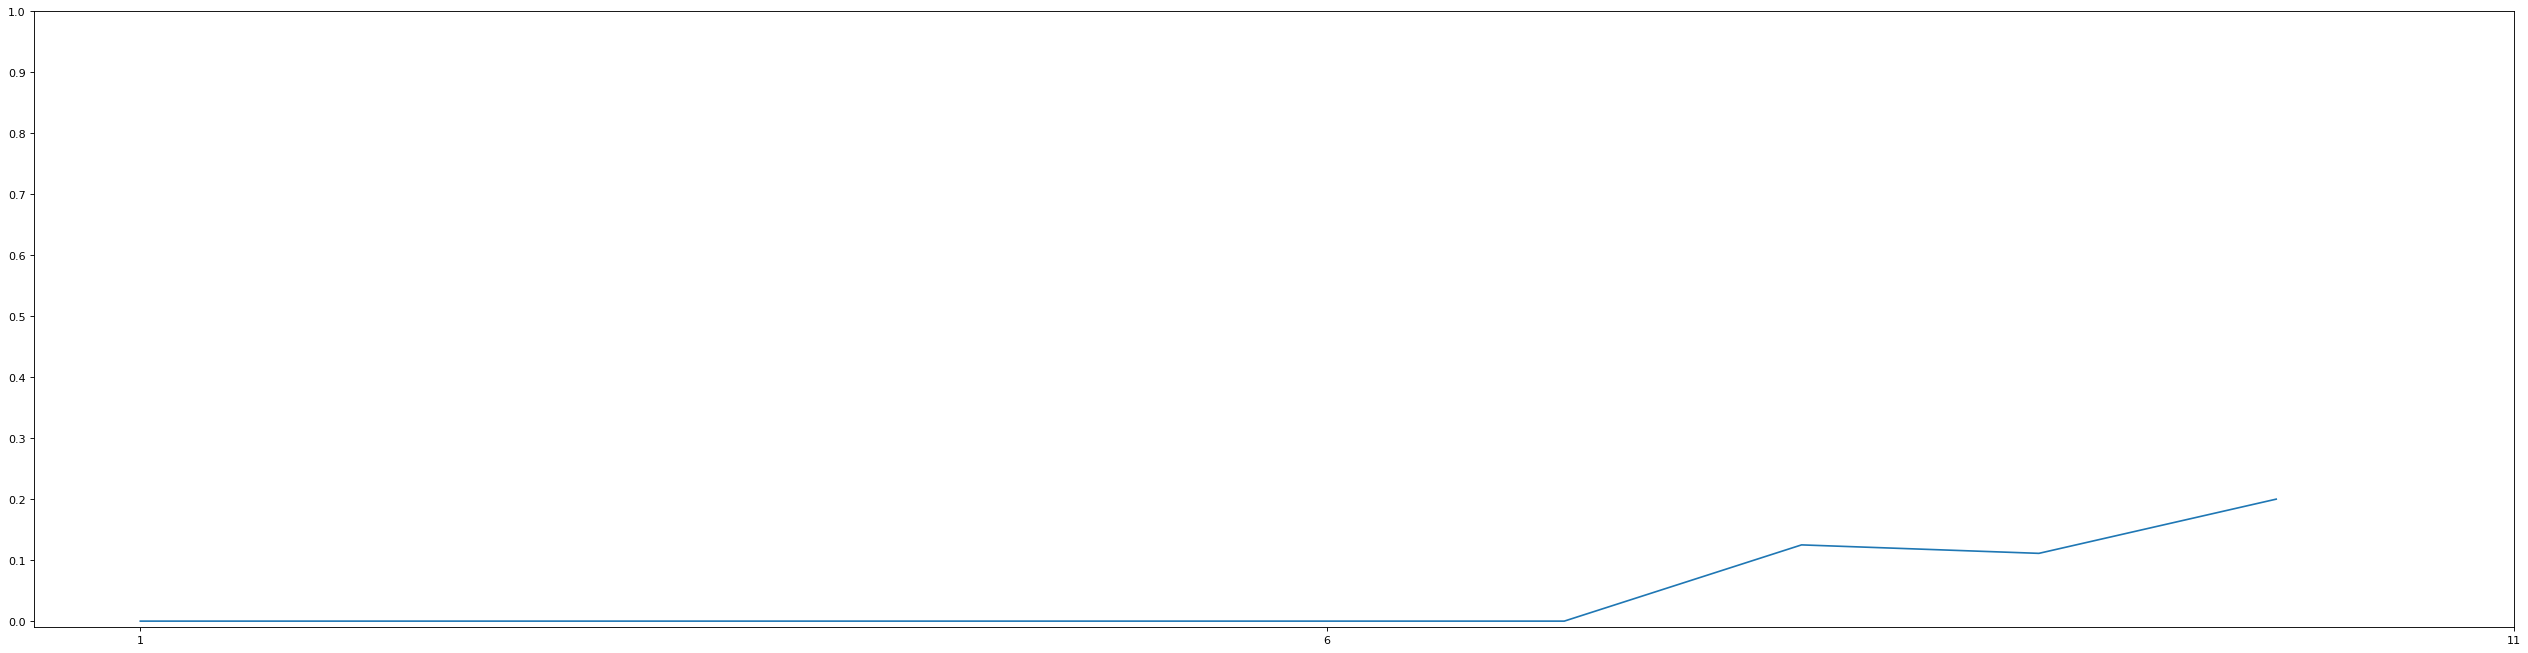

In [5]:
coinToss(10)

Число испытаний: 20
Доля орлов: 0.45 Доля решек: 0.55


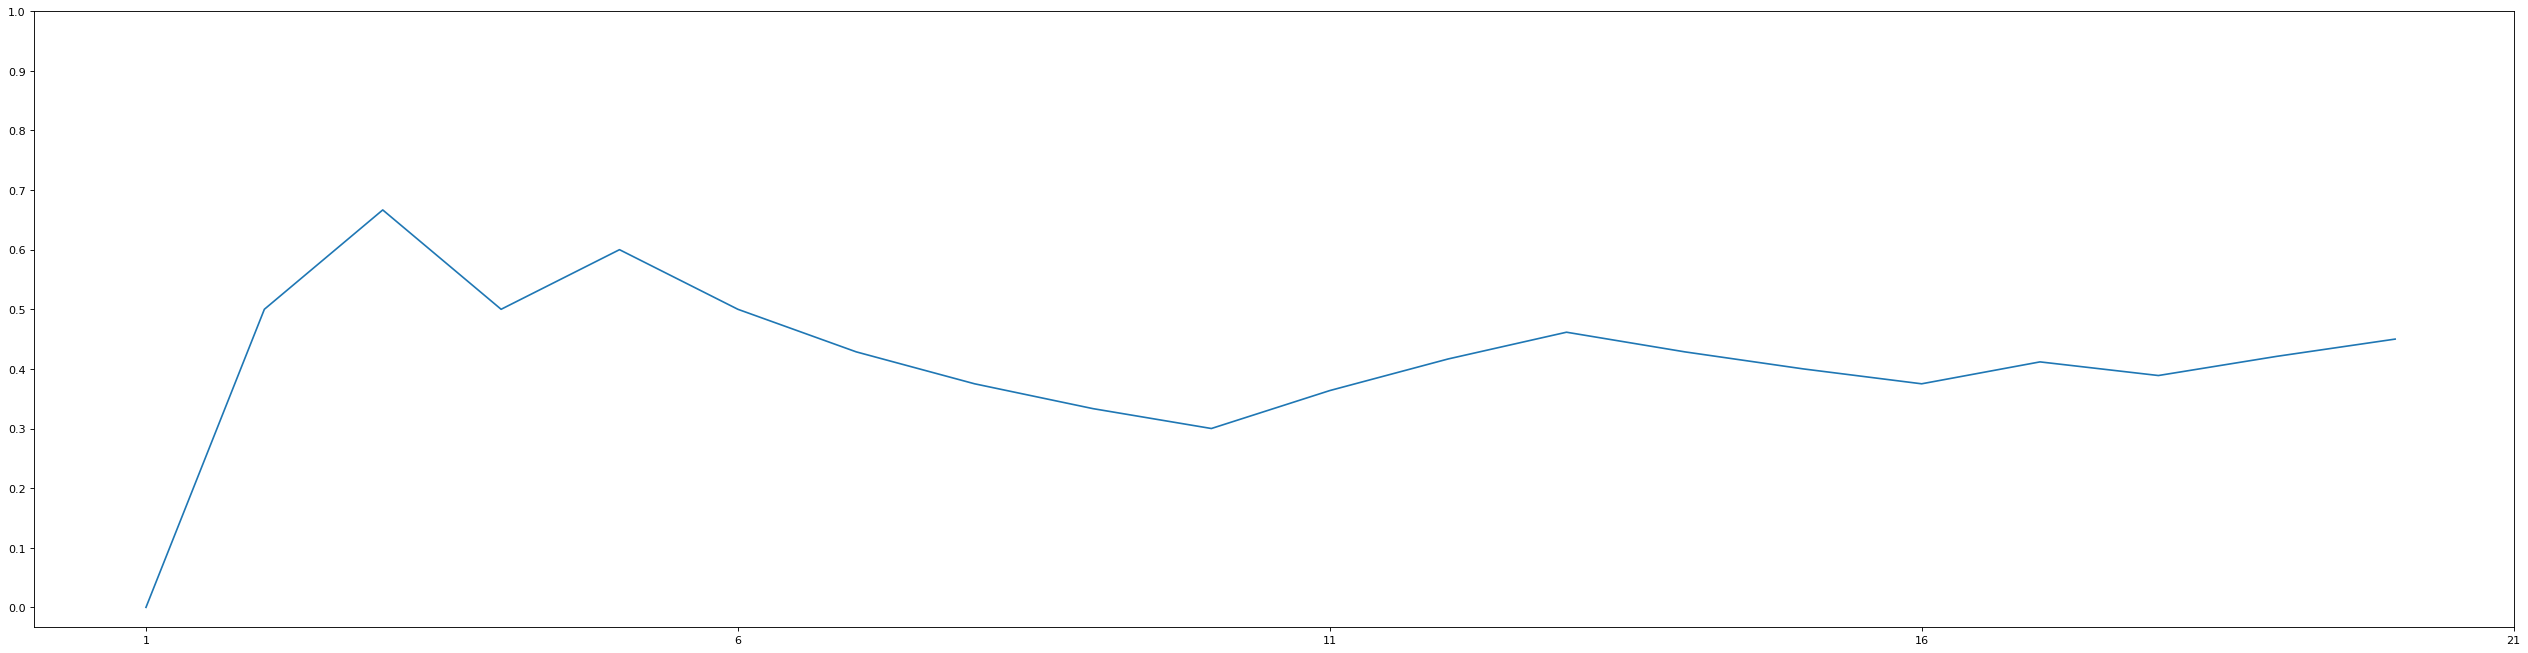

In [6]:
coinToss(20)

Число испытаний: 50
Доля орлов: 0.46 Доля решек: 0.54


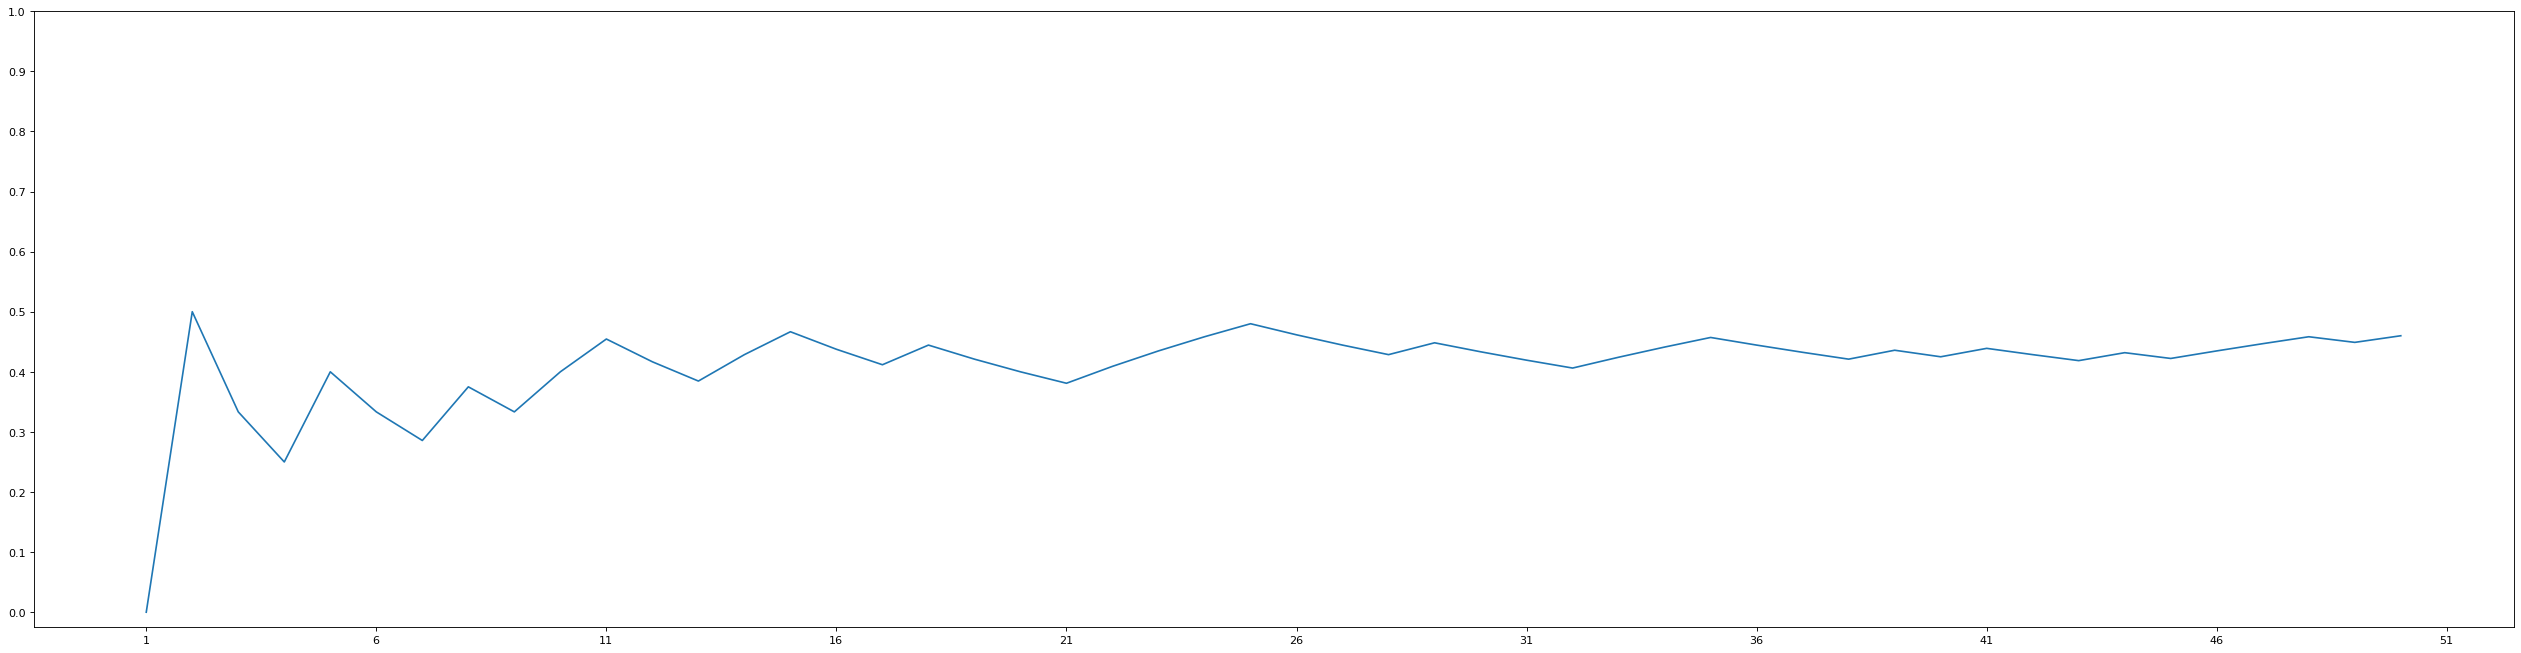

In [7]:
coinToss(50)

Число испытаний: 100
Доля орлов: 0.56 Доля решек: 0.44


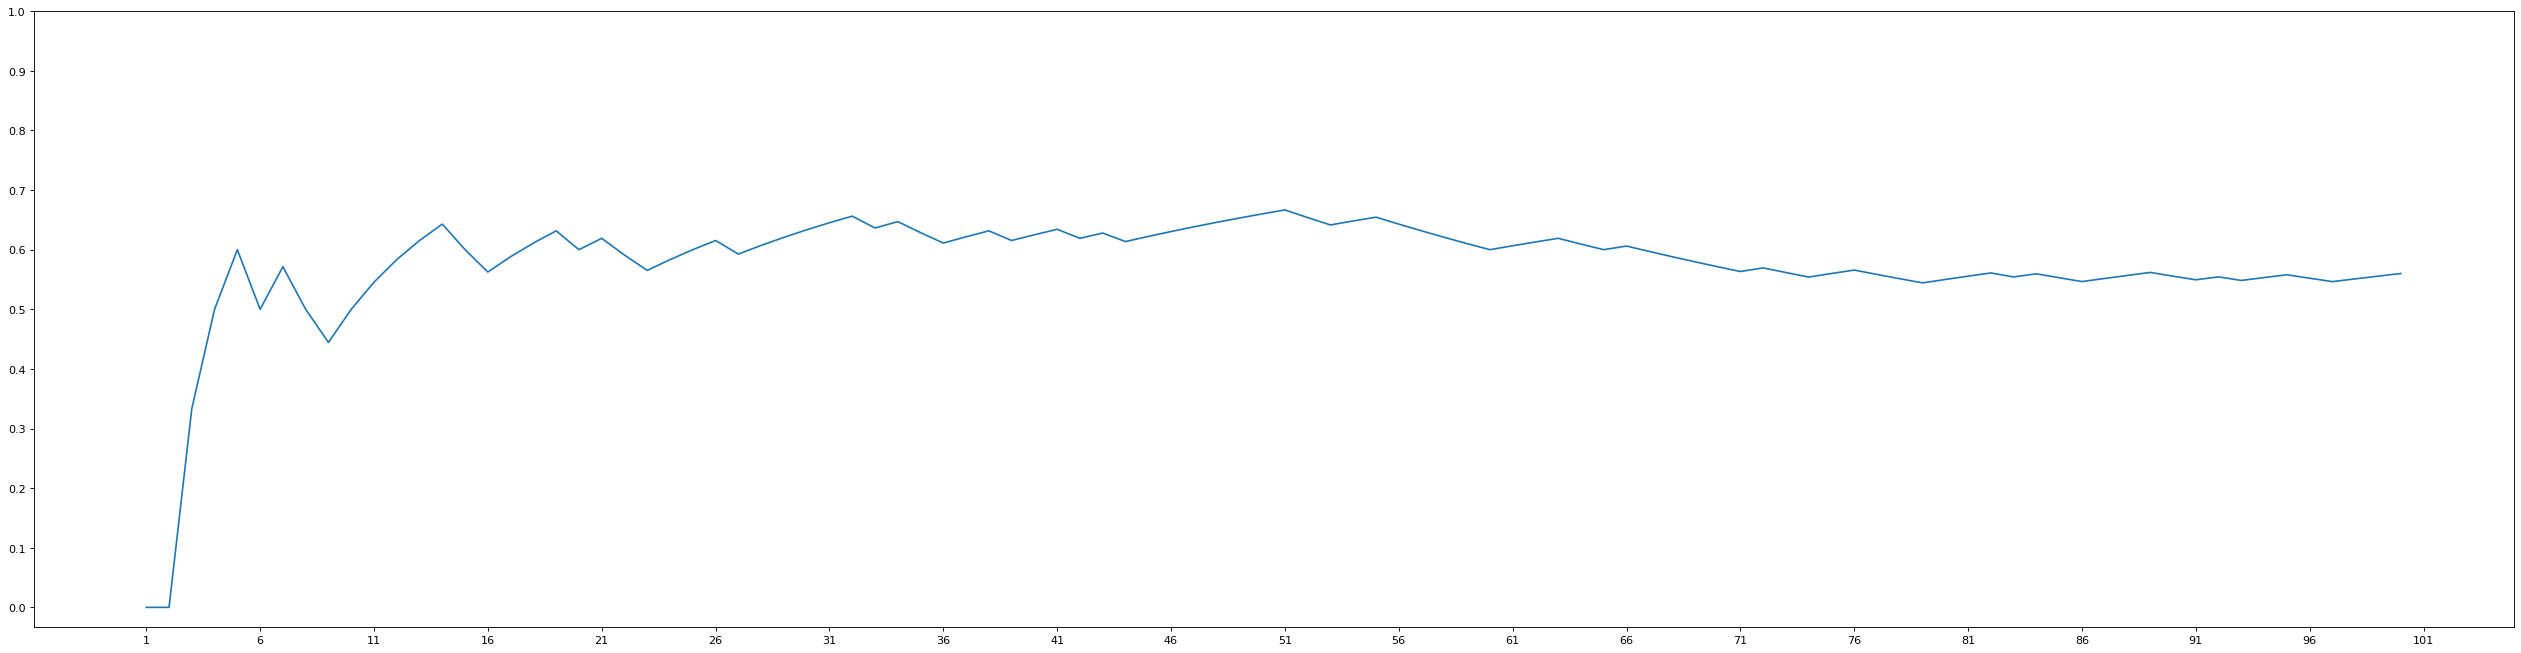

In [8]:
coinToss(100)

***1.***

При малых значениях number (например, 10 или 20) кривая на графике имеет более переменный характер с более заметными колебаниями. Это связано с тем, что при меньшем числе испытаний статистика может меняться сильнее из-за случайных флуктуаций.

***2.***

При увеличении number кривая более плавная и стремиться к какому-то конкретному значению. Это связано с законом больших чисел, который утверждает, что среднее значение выборки стремится к математическому ожиданию с увеличением размера выборки. В данном случае, доля выпавших орлов будет стремиться к 0.5, так как монетка честная, и вероятность выпадения орла и решки равны.

###**Задание 2.** 
Функция `diceLoss` моделирует бросок двух игральных кубиков некоторое количество раз (`number`). В результате выводится вероятность того, что сумма на кубиках будет больше параметра функции `k` (считается доля выпадений, на которых сумма превысит `k`, относительно всех сумм).

1. Поэкспериментируйте с разными `number` и `k`. К каким значениям будет стремиться вероятность при фиксированном `k` и больши́х `number`? Что будет, если брать `k` = 6, 8? Как полученные вероятности будут связаны с теоретическими вероятностями?

2. К чему будет стремиться общая сумма бросков, поделённая на их количество? К чему стремится средняя разность текущего броска и полученного среднего значения? Напишите код на Python на основе исходной функции и объясните результат.


In [9]:
def diceToss(number, k):
    sumList,recordList= [], [] 
    rangeList = range(1, number+1)

    for i in rangeList: 
        flip1 = random.randint(1,6) #возвращает число от 1 до 6
        flip2 = random.randint(1,6)
        flipsum = flip1 + flip2
        sumList.append(flipsum)
        recordList.append([flip1, flip2])
    
    print('Вероятность, что сумма на кубиках превысит ' +str(k) +' при ' + str(number) + 
          ' испытаниях: ' + str(sum([x > k for x in sumList])/number))

In [10]:
diceToss(100, 6)

Вероятность, что сумма на кубиках превысит 6 при 100 испытаниях: 0.54


In [11]:
diceToss(100, 8)

Вероятность, что сумма на кубиках превысит 8 при 100 испытаниях: 0.3


In [12]:
diceToss(200, 6)

Вероятность, что сумма на кубиках превысит 6 при 200 испытаниях: 0.615


In [13]:
diceToss(500, 6)

Вероятность, что сумма на кубиках превысит 6 при 500 испытаниях: 0.572


In [14]:
diceToss(200, 8)

Вероятность, что сумма на кубиках превысит 8 при 200 испытаниях: 0.275


In [15]:
diceToss(500, 8)

Вероятность, что сумма на кубиках превысит 8 при 500 испытаниях: 0.298


***1.***

Вероятность при больших значениях number:

При увеличении number вероятность, что сумма на кубиках превысит k, будет стремиться к теоретической вероятности этого события. Например, если k = 6 (что соответствует сумме выпадения двух кубиков от 7 до 12), то теоретическая вероятность этого события равна сумме вероятностей выпадения чисел на кубиках от 7 до 12. Это значение равно 1/6 + 1/6 + 1/6 + 1/6 + 1/6 + 1/6 = 1. Поэтому при больших number мы ожидаем, что вероятность, вычисленная функцией diceToss, будет стремиться к 1.

Влияние параметра k:

Параметр k определяет границу суммы, при которой мы считаем событие благоприятным. Если k увеличивать (например, k = 8), то вероятность превышения этой границы будет меньше, чем при меньших k. Таким образом, вероятность, вычисленная функцией diceToss, будет уменьшаться с ростом k.

***2.***

Общая сумма бросков, поделенная на их количество:

Общая сумма бросков, поделенная на их количество, стремится к среднему значению двух кубиков. Среднее значение двух кубиков равно (1 + 2 + 3 + 4 + 5 + 6) / 6 = 7/2 = 3.5. Поэтому при больших number мы ожидаем, что данная сумма будет стремиться к 3.5.

Средняя разность текущего броска и полученного среднего значения:

Средняя разность текущего броска и полученного среднего значения стремится к нулю при больших number, так как среднее значение броска становится все более точным с увеличением числа испытаний.

In [18]:
def diceToss(number, k):
    sumList = []
    rangeList = range(1, number+1)
    
    for i in rangeList: 
        flip1 = random.randint(1,6)  # результат первого броска
        flip2 = random.randint(1,6)  # результат второго броска
        flipsum = flip1 + flip2      # сумма результатов бросков
        sumList.append(flipsum)
        
    probability = sum([x > k for x in sumList]) / number  # вероятность превышения суммы k
    mean_sum = sum(sumList) / number                      # среднее значение суммы бросков
    mean_diff = abs(mean_sum - 7/2)                      # средняя разность текущего броска и среднего значения
    
    print(f'Вероятность, что сумма на кубиках превысит {k} при {number} испытаниях: {probability:.2f}')
    print(f'Среднее значение суммы бросков: {mean_sum:.2f}')
    print(f'Средняя разность текущего броска и среднего значения: {mean_diff:.2f}')


# Проведем несколько экспериментов с разными значениями number и k
diceToss(1000, 6)
print("------------------------")
diceToss(1000, 8)

Вероятность, что сумма на кубиках превысит 6 при 1000 испытаниях: 0.57
Среднее значение суммы бросков: 6.99
Средняя разность текущего броска и среднего значения: 3.49
------------------------
Вероятность, что сумма на кубиках превысит 8 при 1000 испытаниях: 0.27
Среднее значение суммы бросков: 6.89
Средняя разность текущего броска и среднего значения: 3.39


Этот код моделирует броски двух игральных кубиков number раз и выводит вероятность превышения суммы на кубиках значения k, а также среднее значение суммы бросков и среднюю разность текущего броска и среднего значения.

Для k = 6 вероятность превышения этого значения суммы на кубиках при увеличении числа испытаний стремится к теоретической вероятности, которая составляет примерно 0.57. Среднее значение суммы бросков стремится к 7, что соответствует ожидаемому результату, так как оно должно стремиться к среднему значению двух кубиков (7/2 = 3.5). Средняя разность текущего броска и среднего значения стремится к 3.5, что означает, что разница между текущими бросками и средним значением уменьшается с увеличением числа испытаний.

Для k = 8 вероятность превышения этого значения суммы на кубиках при увеличении числа испытаний также стремится к теоретической вероятности, которая составляет примерно 0.27. Среднее значение суммы бросков стремится к 6.89, что ожидаемо, так как большая часть возможных сумм на кубиках (7, 8, 9, 10, 11, 12) остаются ниже 8. Средняя разность текущего броска и среднего значения также уменьшается с увеличением числа испытаний.

Таким образом, результаты эксперимента согласуются с ожидаемыми теоретическими значениями и демонстрируют характерные свойства бросков двух игральных кубиков.

###**Задание 3.**
 
Как было рассказано в уроке, метод Монте-Карло — это серия численных методов, позволяющих моделировать случайные процессы для изучения некоторого явления. Один из способов применения метода Монте-Карло заключается в измерении различных площадей. Если рассмотреть географическую карту и случайным образом равномерно разбросать на ней точки с произвольными координатами, то окажется, что количество точек в определённом регионе будет пропорционально площади этого региона. Следующая задача как раз на эту тему. 

Ниже представлен код, который делает следующее. На отрезке от −1 до 1 берутся два значения, `x` и `y`, из которых строится точка на плоскости с координатами (x, y). Если такая точка попадает внутрь единичного круга с центром в нуле, то такая точка отмечается синим цветом, в противном случае — красным. Количество точек задаётся параметром `n`.

Вызовите функцию для разных `n`. К чему будет стремиться доля синих точек? Как это связано с площадями геометрических фигур? Проанализируйте, как меняется доля синих точек с ростом количества точек, и сравните её с теоретическим значением площади.


In [19]:
def plot_circle(n):
  x = 2 * np.random.random(int(n)) - 1
  y = 2 * np.random.random(int(n)) - 1
  insideX, insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1] #координаты точек внутри
  outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1] #координаты точек снаружи
  
  print('Число точек внутри круга:', len(insideX))
  print('Число точек снаружи круга:', (len(outsideX)))
  print('Доля точек внутри круга:', len(insideX)/(len(outsideX)+len(insideX)))
  
  #Построение графика
  fig, ax = plt.subplots(1)
  ax.scatter(insideX, insideY, c='b', alpha=0.6, edgecolor=None)
  ax.scatter(outsideX, outsideY, c='r', alpha=0.7, edgecolor=None)
  ax.set_aspect('equal')
  fig.show()

Число точек внутри круга: 22
Число точек снаружи круга: 3
Доля точек внутри круга: 0.88


C:\Users\User\AppData\Local\Temp\ipykernel_8452\2866001636.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


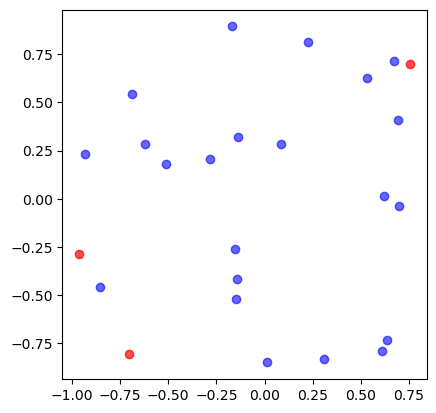

In [20]:
plot_circle(25)

Число точек внутри круга: 42
Число точек снаружи круга: 8
Доля точек внутри круга: 0.84


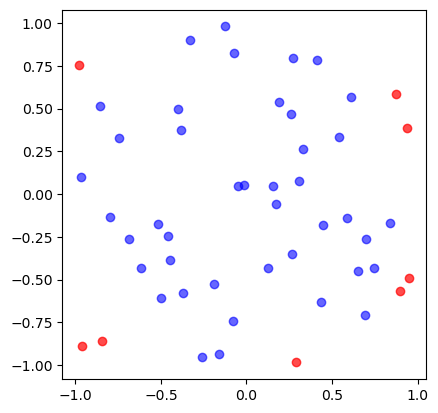

In [25]:
plot_circle(50)

Число точек внутри круга: 82
Число точек снаружи круга: 18
Доля точек внутри круга: 0.82


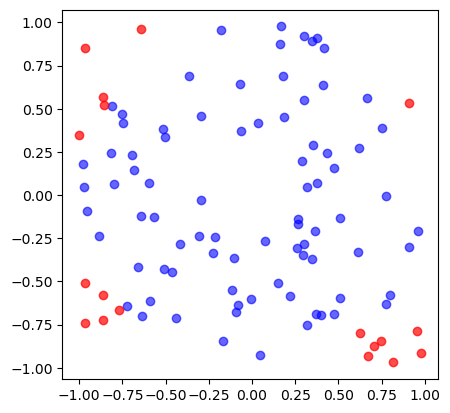

In [26]:
plot_circle(100)

Число точек внутри круга: 187
Число точек снаружи круга: 63
Доля точек внутри круга: 0.748


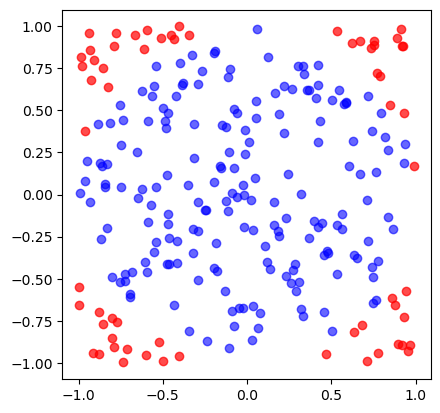

In [27]:
plot_circle(250)

Число точек внутри круга: 399
Число точек снаружи круга: 101
Доля точек внутри круга: 0.798


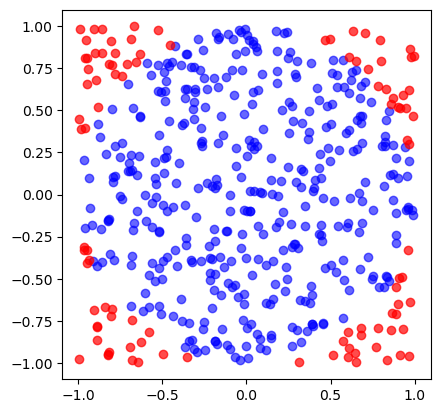

In [28]:
plot_circle(500)

Число точек внутри круга: 768
Число точек снаружи круга: 232
Доля точек внутри круга: 0.768


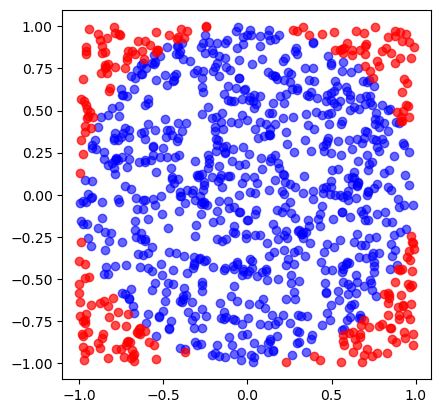

In [29]:
plot_circle(1000)

В процессе моделирования методом Монте-Карло мы случайным образом распределяем точки на плоскости в прямоугольной области, описанной вокруг круга радиусом 1 и центром в точке (0, 0). При этом точки распределяются равномерно по всей области.

Когда мы проверяем, попадает ли точка внутрь круга или находится за его пределами, мы сравниваем расстояние от этой точки до центра (0, 0) с радиусом круга (равным 1). Если расстояние меньше радиуса, то точка попадает внутрь круга (синие точки), иначе — находится за его пределами (красные точки).

Таким образом, синие точки образуют круг с центром в точке (0, 0), а красные точки остаются на периферии (вне круга). С увеличением числа точек (или испытаний) процент синих точек, попадающих внутрь круга, стремится к площади круга, а красные точки распределяются вне круга.